<a href="https://colab.research.google.com/github/mohith2326/pdsas3/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data:
╒═══════════════╤═══════════╤═════════════════╤═════════════════╤═══════════╤═══════╤════════════════════════════╤═══════╤═══════════╕
│   Pregnancies │   Glucose │   BloodPressure │   SkinThickness │   Insulin │   BMI │   DiabetesPedigreeFunction │   Age │   Outcome │
╞═══════════════╪═══════════╪═════════════════╪═════════════════╪═══════════╪═══════╪════════════════════════════╪═══════╪═══════════╡
│             6 │       148 │              72 │              35 │         0 │  33.6 │                      0.627 │    50 │         1 │
├───────────────┼───────────┼─────────────────┼─────────────────┼───────────┼───────┼────────────────────────────┼───────┼───────────┤
│             1 │        85 │              66 │              29 │         0 │  26.6 │                      0.351 │    31 │         0 │
├───────────────┼───────────┼─────────────────┼─────────────────┼───────────┼───────┼────────────────────────────┼───────┼───────────┤
│             8 │       183 │           

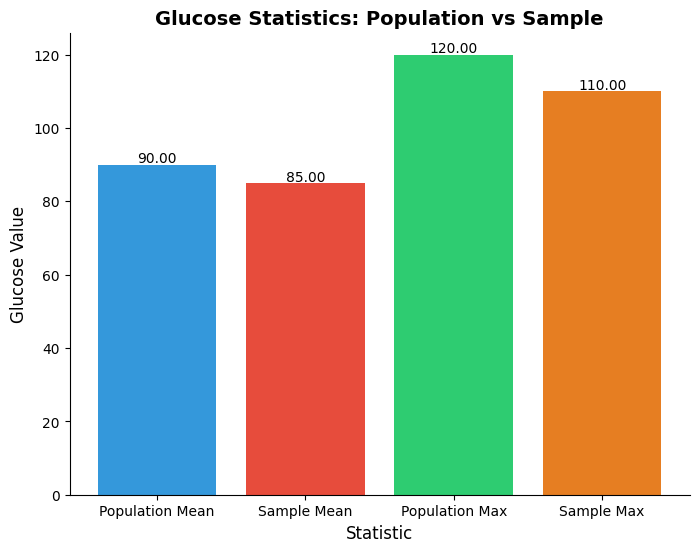

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
print("Original Data:")
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid', showindex=False))
np.random.seed(42)
sample = data.sample(n=25)
print("\nSample Data:")
print(tabulate(sample, headers='keys', tablefmt='fancy_grid', showindex=False))
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()


population_mean_glucose = 90
sample_mean_glucose = 85
population_highest_glucose = 120
sample_highest_glucose = 110
labels = ['Population Mean', 'Sample Mean', 'Population Max', 'Sample Max']
values = [population_mean_glucose, sample_mean_glucose, population_highest_glucose, sample_highest_glucose]
colors = ['#3498db','#e74c3c', '#2ecc71', '#e67e22']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}', ha='center', color='black')
plt.title('Glucose Statistics: Population vs Sample', fontsize=14, fontweight='bold')
plt.xlabel('Statistic', fontsize=12)
plt.ylabel('Glucose Value', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 46.42399999999998


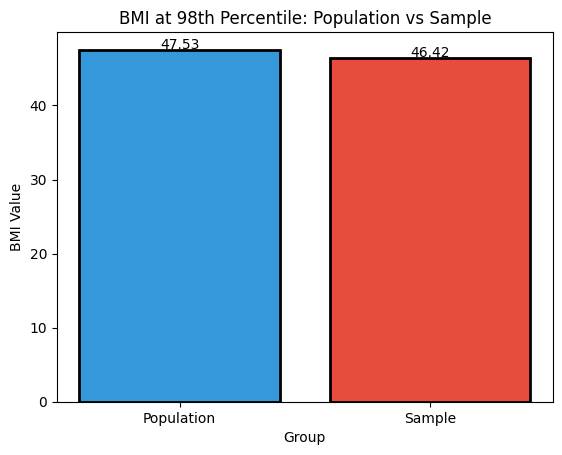

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes data
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Set a seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(n=45)

# Calculate the 98th percentile of BMI for both population and sample
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

# Display the 98th percentile values
print("Population 98th Percentile BMI:", population_98th_percentile_bmi)
print("Sample 98th Percentile BMI:", sample_98th_percentile_bmi)

# Compare population and sample 98th percentile BMI using charts
labels = ['Population', 'Sample']
values = [population_98th_percentile_bmi, sample_98th_percentile_bmi]
colors = ['#3498db', '#e74c3c']

# Create a bar plot
plt.bar(labels, values, color=colors, edgecolor='black', linewidth=2)

# Add data values on top of the bars
for label, value in zip(labels, values):
    plt.text(label, value + 0.1, f'{value:.2f}', ha='center', color='black')

# Set a simple title
plt.title('BMI at 98th Percentile: Population vs Sample')

# Set labels for the axes
plt.xlabel('Group')
plt.ylabel('BMI Value')

# Show the plot
plt.show()


Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 90th Percentile BloodPressure: 88.0

Average Bootstrap Mean BloodPressure: 69.17692000000001
Average Bootstrap Standard Deviation BloodPressure: 19.010032376696216
Average Bootstrap 90th Percentile BloodPressure: 87.24980000000001


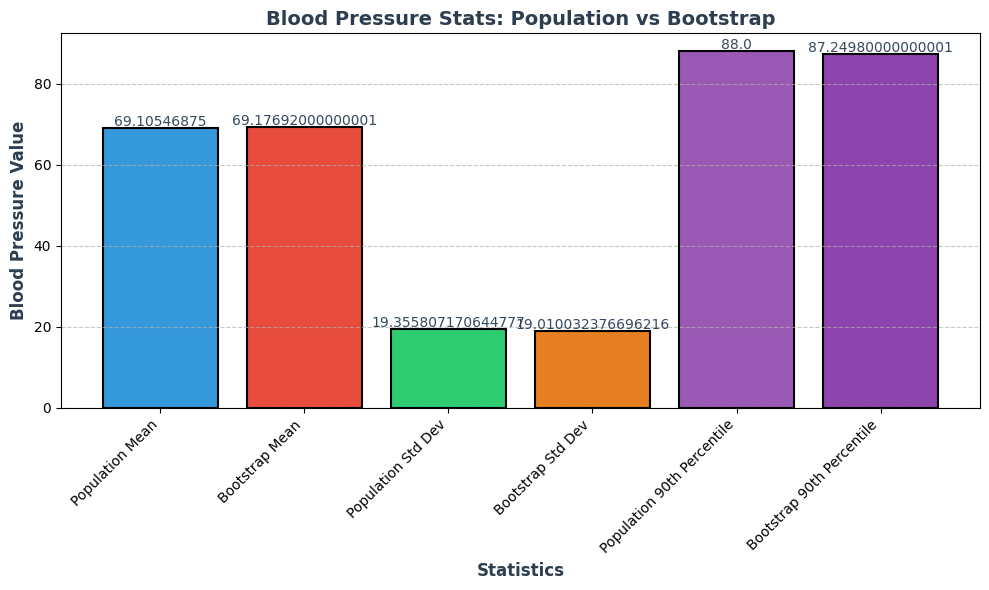

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
np.random.seed(42)
num_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

for _ in range(num_samples):

    bootstrap_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)

    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_std_devs.append(np.std(bootstrap_sample))
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 90))
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_90_bp = np.percentile(data['BloodPressure'], 90)
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation BloodPressure:", population_std_dev_bp)
print("Population 90th Percentile BloodPressure:", population_percentile_90_bp)
average_bootstrap_mean = np.mean(bootstrap_means)
average_bootstrap_std_dev = np.mean(bootstrap_std_devs)
average_bootstrap_percentile_90 = np.mean(bootstrap_percentiles)

print("\nAverage Bootstrap Mean BloodPressure:", average_bootstrap_mean)
print("Average Bootstrap Standard Deviation BloodPressure:", average_bootstrap_std_dev)
print("Average Bootstrap 90th Percentile BloodPressure:", average_bootstrap_percentile_90)
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 90th Percentile', 'Bootstrap 90th Percentile']
values = [population_mean_bp, average_bootstrap_mean, population_std_dev_bp, average_bootstrap_std_dev, population_percentile_90_bp, average_bootstrap_percentile_90]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#e67e22', '#9b59b6', '#8e44ad']
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors, edgecolor='black', linewidth=1.5)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value}', ha='center', color='#34495e', fontsize=10)
plt.title('Blood Pressure Stats: Population vs Bootstrap', fontsize=14, fontweight='bold', color='#2c3e50')
plt.xlabel('Statistics', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('Blood Pressure Value', fontsize=12, fontweight='bold', color='#2c3e50')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='dashed', alpha=0.7)
plt.tight_layout()
plt.show()
